PROYECTO DE BI PARA ESCUELA DEPORTIVA, TABLA CLASE

PAQUETES E IMPORTACIONES A UTILIZAR

In [3]:
#crear entorno virtual en la carpeta del proyecto:
# python -m venv env o mi_entorno
# env/Script/Activate         para activar el entorno virtual en windows
# source env/bin/activate     para activar en linux
#instalar las siguientes librerias

#desactivar / deactivate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer #pip install scikit-learn


Cargar los datos

In [4]:
data = pd.read_csv('data/datos_sinprocesar/matricula_202510051809.csv')

Visualizar los datos

In [4]:
data.head()

,id_matricula,costo,fecha_pago
0,1,195188.22,2023-10-11 01:07:18
1,2,100000.00,2024-11-10 18:40:09
2,3,100000.00,2025-07-15 19:27:28
3,4,116713.39,2025-05-04 16:23:44
4,5,100000.00,2024-05-29 19:03:32


Verificar la estructura de los datos

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_matricula  1000 non-null   int64  
 1   costo         909 non-null    float64
 2   fecha_pago    1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


Estadistico

In [6]:
data.describe()

,id_matricula,costo
count,1000.000000,909.000000
mean,500.500000,123563.342255
std,288.819436,54120.382012
min,1.000000,50915.900000
25%,250.750000,100000.000000
50%,500.500000,100000.000000
75%,750.250000,100000.000000
max,1000.000000,299076.660000


Estadistica de Campos Categoricos

In [7]:
data.describe(include='O')

,fecha_pago
count,1000
unique,1000
top,2023-10-11 01:07:18
freq,1


Visualizar el tamaño del dataset (dataframe)

In [9]:
data.shape

(1000, 3)

OUTLIERS - Modo Grafico

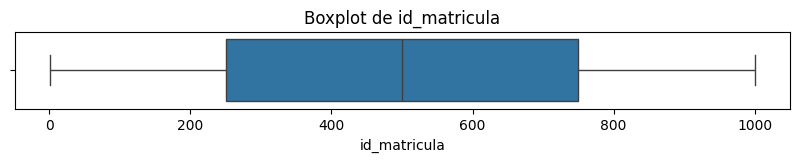

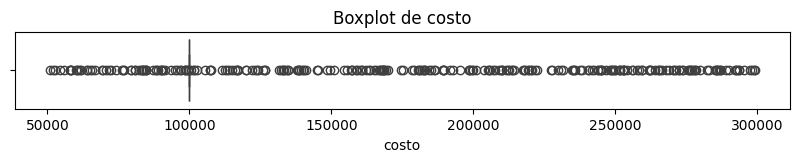

In [6]:
cols = data.select_dtypes(include=['number']).columns
for col in cols:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=data[cols], x=col)
    #sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

OUTLIERS - Calculado

rango intercuartilico IRQ

In [7]:
outliers = {}

for col in cols:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1  # Rango Intercuartílico

    LI = Q1 - 1.5 * IQR  # Límite inferior
    LS = Q3 + 1.5 * IQR  # Límite superior

    outliers_col = data[(data[col] < LI) | (data[col] > LS)][col]
    outliers[col] = outliers_col

    print(f'{col}: {len(outliers_col)} outliers')
    print(f'  Límites: [{LI:.2f}, {LS:.2f}]')
    print(f'  Min: {data[col].min()}, Max: {data[col].max()}')
    print('-' * 40)

id_matricula: 0 outliers
  Límites: [-498.50, 1499.50]
  Min: 1, Max: 1000
----------------------------------------
costo: 0 outliers
  Límites: [nan, nan]
  Min: 50915.9, Max: 299076.66
----------------------------------------


STR

In [19]:
outliers={}
for col in cols:
  mean=data[col].mean()
  std=data[col].std()

  outliers[col] = (data[col] > (mean + 3 *std)).sum() + (data[col] < (mean - 3 *std)).sum()

print(outliers)

{'id_matricula': np.int64(0), 'costo': np.int64(15)}


Histogramas - Outliers

<Axes: xlabel='costo', ylabel='Count'>

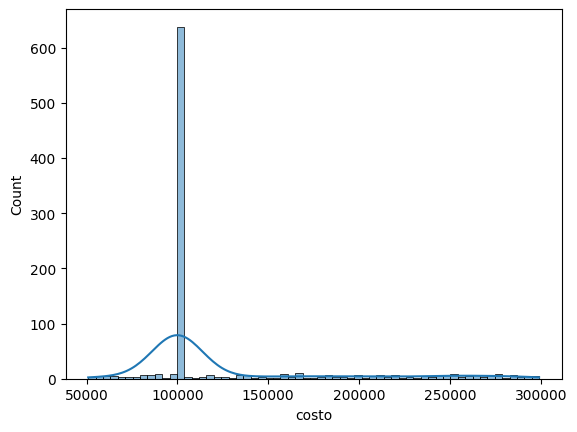

In [20]:
sns.histplot(data=data, x='costo', kde=True)

Valores Nulos

In [15]:
data.isna().mean()*100

id_matricula    0.0
costo           9.1
fecha_pago      0.0
dtype: float64

Eliminar valores Nulos

In [13]:
# Eliminar filas con valores nulos en la columna y filas donde el nombre esta vacio (cadena vacia o solo espacios)
data = data[data['costo'].notna() & (data['costo'] != '')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_matricula  909 non-null    int64  
 1   costo         909 non-null    float64
 2   fecha_pago    909 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 28.4+ KB


Guardar data limpia de valores nulos eliminados

In [16]:
data.to_csv('data/datos_preprocesados/matricula.csv', index=False)

Imputar datos

In [22]:
impute=SimpleImputer(strategy='median')

print('Mediana inicial: ', data['costo'].median())

salida=impute.fit_transform(data[['costo']])

salida=pd.DataFrame(salida)

print('\nNulos en los nuevos datos: ',salida.isna().sum())
print('\nMediana nuevos datos: ',salida.median())


Mediana inicial:  100000.0

Nulos en los nuevos datos:  0    0
dtype: int64

Mediana nuevos datos:  0    100000.0
dtype: float64


Limpieza relacional con la tabla alumno

In [17]:
alumnos = pd.read_csv('data/datos_procesador/alumno_limpio.csv')


In [18]:
matricula = pd.read_csv('data/datos_preprocesados/matricula.csv')

In [19]:
ids_matricula_validos = alumnos['matricula_id'].unique()

matricula = matricula[matricula['id_matricula'].isin(ids_matricula_validos)]


In [20]:
print('Filas finales en matricula:', matricula.shape[0])
print('IDs únicos en alumnos:', alumnos['matricula_id'].nunique())
print('IDs únicos en matricula:', matricula['id_matricula'].nunique())


Filas finales en matricula: 234
IDs únicos en alumnos: 255
IDs únicos en matricula: 234


Guardar datos

In [21]:
matricula.to_csv('data/datos_procesador/matricula_limpia.csv', index=False)